# Problem Description
A Chinese automobile company Teclov aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

###### Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car

• How well do those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.


# Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market. 

**Car_ID** Unique id of each observation (Interger)	

**Symboling**  Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		

**carCompany** Name of car company (Categorical)	

**fueltype** Car fuel type i.e gas or diesel (Categorical)	

**aspiration** Aspiration used in a car (Categorical)	

**doornumber** Number of doors in a car (Categorical)	

**carbody** body of car (Categorical)		

**drivewheel** type of drive wheel (Categorical)		

**enginelocation** Location of car engine (Categorical)	

**wheelbase** Weelbase of car (Numeric)		

**carlength** Length of car (Numeric)		

**carwidth** Width of car (Numeric)		

**carheight** height of car (Numeric)	

**curbweight** The weight of a car without occupants or baggage. (Numeric)	

**enginetype** Type of engine. (Categorical)

**cylindernumber** cylinder placed in the car (Categorical)	

**enginesize** Size of car (Numeric)		

**fuelsystem** Fuel system of car (Categorical)		

**boreratio** Boreratio of car (Numeric)		

**stroke** Stroke or volume inside the engine (Numeric)	

**compressionratio** compression ratio of car (Numeric)	

**horsepower** Horsepower (Numeric)		

**peakrpm** car peak rpm (Numeric)		

**citympg** Mileage in city (Numeric)		

**highwaympg** Mileage on highway (Numeric)		

**price(Dependent variable)** Price 




In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Importing CSV file into Python using Pandas
df = pd.read_csv(r'C:\Users\Newton\Desktop\DA\Data\CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Set option to view all columns in pandas
pd.set_option("display.max_columns", None)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Cleaning Data

In [5]:
#Using string split to filter out the car brands into their own column. I believe this can be useful later in the analysis.
df['CarBrand'] = df['CarName'].str.split(' ',expand=True)[0]
df['CarName'] = df['CarName'].str.split(' ',expand=True)[1]

In [6]:
#Capitalizing car brands and names
df['CarBrand'] = df['CarBrand'].str.title()
df['CarName'] = df['CarName'].str.title()

In [7]:
df['CarName'].head()

0          Giulia
1         Stelvio
2    Quadrifoglio
3             100
4           100Ls
Name: CarName, dtype: object

&nbsp;

In [8]:
# Some of the values are not imputed in the correct format.
df['CarBrand'].unique()

array(['Alfa-Romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Maxda', 'Mazda', 'Buick', 'Mercury',
       'Mitsubishi', 'Nissan', 'Peugeot', 'Plymouth', 'Porsche',
       'Porcshce', 'Renault', 'Saab', 'Subaru', 'Toyota', 'Toyouta',
       'Vokswagen', 'Volkswagen', 'Vw', 'Volvo'], dtype=object)

In [9]:
def names(brand):
    if 'Toyouta' in brand:
        return 'Toyota'
    elif 'Maxda' in brand:
        return 'Mazda'
    elif 'Bmw' in brand:
        return 'BMW'
    elif 'Vokswagen' in brand:
        return 'Volkswagen'
    elif 'Vw' in brand:
        return 'Volkswagen'
    elif 'Porcshce' in brand:
        return 'Porsche'
    else:
        return brand

In [10]:
df['CarBrand'] = df['CarBrand'].apply(names)

In [11]:
df['CarBrand'].unique()

array(['Alfa-Romero', 'Audi', 'BMW', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Mazda', 'Buick', 'Mercury', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab',
       'Subaru', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

&nbsp;

<AxesSubplot:>

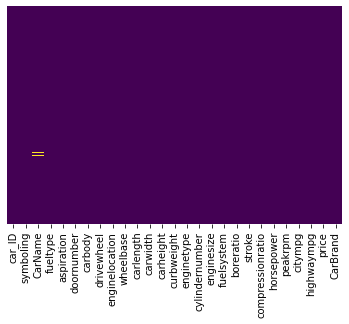

In [12]:
# looking for missing values using seaborn
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# Looks like we have a few missing columns let see what they are 
df[df.isnull().any(axis=1)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
138,139,2,None,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0,Subaru
141,142,0,None,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2145,ohcf,four,108,2bbl,3.62,2.64,9.5,82,4800,32,37,7126.0,Subaru


In [14]:
# Since we only have two values with null values I am going to drop them
df.dropna(axis = 0, inplace = True)

<AxesSubplot:>

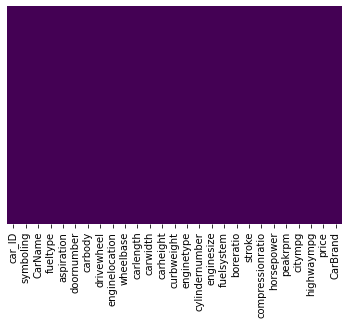

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
# Look like we dont have any duplicated values
df[df.duplicated(subset=None, keep='first')]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand


##### Now that we cleaned the data we can move onto our exploratory data analysis phase

&nbsp;

## EDA

In [17]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,Giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-Romero
1,2,3,Stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-Romero
2,3,1,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-Romero
3,4,2,100,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi
4,5,2,100Ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi


In [18]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,102.630542,0.832512,98.789163,174.143842,65.922660,53.731034,2560.078818,127.147783,3.326897,3.262857,10.15133,104.399015,5127.832512,25.157635,30.694581,13347.200330
std,59.497287,1.247384,6.039964,12.338152,2.148216,2.454068,521.221484,41.773527,0.270629,0.305642,3.99058,39.631013,478.525201,6.544197,6.896356,7995.739861
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.00000,48.000000,4150.000000,13.000000,16.000000,5151.000000
25%,51.500000,0.000000,94.500000,166.550000,64.100000,52.000000,2179.500000,97.500000,3.150000,3.110000,8.55000,70.000000,4800.000000,19.000000,25.000000,7847.000000
50%,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.00000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,154.500000,2.000000,102.400000,183.300000,66.900000,55.500000,2943.500000,143.000000,3.580000,3.410000,9.40000,116.000000,5500.000000,30.000000,34.000000,16509.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.00000,288.000000,6600.000000,49.000000,54.000000,45400.000000


&nbsp;

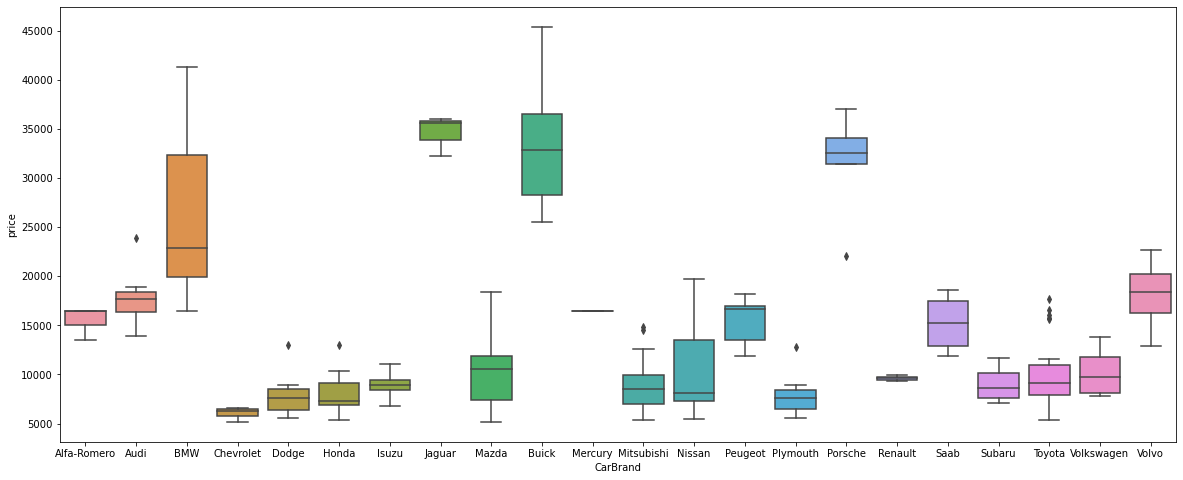

In [19]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='CarBrand',y='price', data = df )
plt.show()

The average price of a Jaguar is larger than the rest of the car brands with Chevrolet being the lowest. BMW's have the greatest price range out of all the cars.

Notice the outliers of price in Audi, Dodge, Honda, Mitsubishi, Plymouth, and Toyota.

&nbsp;

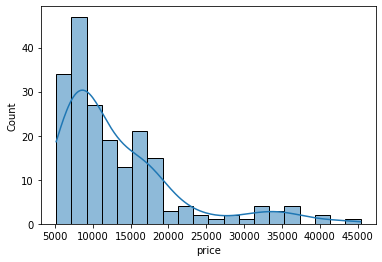

In [20]:
sns.histplot(df['price'], bins=20,kde=True)
plt.show()

Most of the cars fall in the lower end of the price range of below 20,000. This dataset looks a little outdated since most of the cars in the market currently fall don’t below 40,000.

&nbsp;

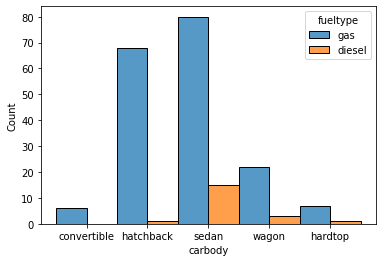

In [21]:
sns.histplot(df,x='carbody',hue='fueltype', multiple="dodge")
plt.show()

Most of the cars in this dataset are either hatchback or sedans. Gas is the dominant fuel type for all type of car bodies. 

Notice this dataset does not include electric cars.

&nbsp;

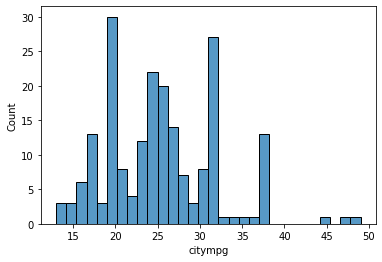

In [22]:
sns.histplot(df['citympg'], bins=30)
plt.show()

From the graph we can see that most of the cars have city mpg from the range of 17-33 range. 
We can see higher preforming outliers with city mpg greater than 40 and lower preforming cars with less than 15 mpg. 

In [23]:
# Outliers with good citympg
df[df['citympg'] > 40][['CarBrand','CarName','citympg','carbody','price']]

,CarBrand,CarName,citympg,carbody,price
18,Chevrolet,Impala,47,hatchback,5151.0
30,Honda,Civic,49,hatchback,6479.0
90,Nissan,Gt-R,45,sedan,7099.0


In [24]:
# Outliers with bad citympg
df[df['citympg'] <= 15][['CarBrand','CarName','citympg','carbody','price']]

,CarBrand,CarName,citympg,carbody,price
17,BMW,X3,15,sedan,36880.0
47,Jaguar,Xj,15,sedan,32250.0
48,Jaguar,Xf,15,sedan,35550.0
49,Jaguar,Xk,13,sedan,36000.0
73,Buick,Century,14,sedan,40960.0
74,Buick,Regal,14,hardtop,45400.0


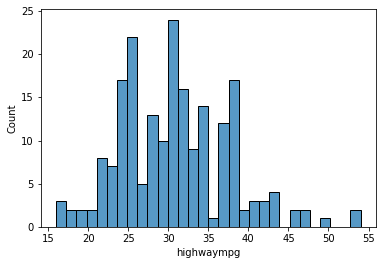

In [25]:
sns.histplot(df['highwaympg'],bins=30)
plt.show()

Most of the cars are in the range of 23-37 in highway mpg. 

In [26]:
# No surprise we see three familiar cars that have good highway mpg
df[df['highwaympg'] > 48][['CarBrand','CarName','citympg','carbody','price']]

,CarBrand,CarName,citympg,carbody,price
18,Chevrolet,Impala,47,hatchback,5151.0
30,Honda,Civic,49,hatchback,6479.0
90,Nissan,Gt-R,45,sedan,7099.0


In [27]:
# We see don't see the BMW x3 at the lower end of highway mpg but do see the other cars. In addition to Buick Opel & Skylark.
df[df['highwaympg'] < 20][['CarBrand','CarName','citympg','carbody','price']]

,CarBrand,CarName,citympg,carbody,price
47,Jaguar,Xj,15,sedan,32250.0
48,Jaguar,Xf,15,sedan,35550.0
49,Jaguar,Xk,13,sedan,36000.0
71,Buick,Opel,16,sedan,34184.0
72,Buick,Skylark,16,convertible,35056.0
73,Buick,Century,14,sedan,40960.0
74,Buick,Regal,14,hardtop,45400.0


From the prices of the cars, we can see that those with lower city and hwy mpg are more expensive than those that are not.

&nbsp;

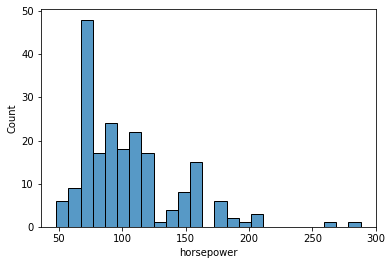

In [28]:
sns.histplot(df['horsepower'], bins=25)
plt.show()

In [29]:
df[df['horsepower']>180]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
15,16,0,X4,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,BMW
16,17,0,X5,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,BMW
17,18,0,X3,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,BMW
49,50,0,Xk,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,Jaguar
73,74,0,Century,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,Buick
74,75,1,Regal,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,Buick
105,106,3,Kicks,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699.0,Nissan
126,127,3,Panamera,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0,Porsche
127,128,3,Cayenne,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0,Porsche
128,129,3,Boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0,Porsche


The cars above 180hp are cars considered luxury or sports cars. In the scatter plot below, we can see that there is a positive correlation of cars with higher hp and price.

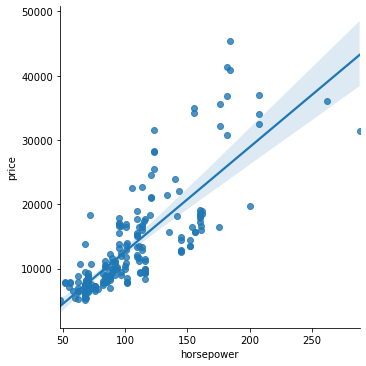

In [30]:
sns.lmplot(x='horsepower',y='price',data=df)
plt.show()

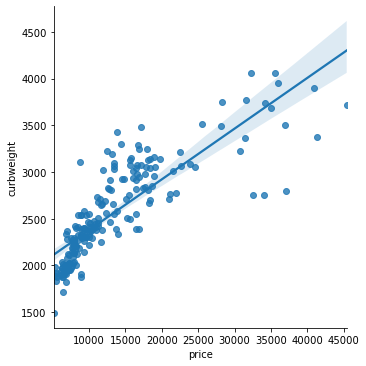

In [31]:
# Lower weight cars are more expensive. Lower weight means faster cars so these would fall in the luxury sports car category.
sns.lmplot(x='price',y='curbweight',data=df)

&nbsp;

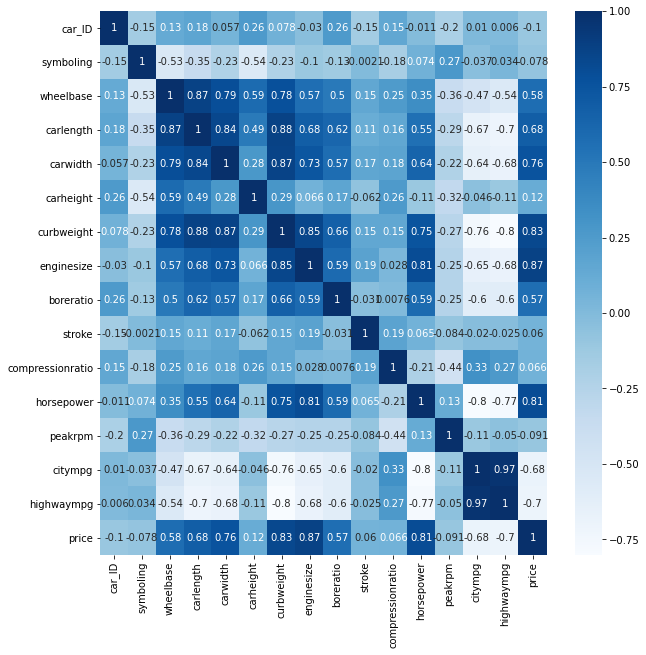

In [32]:
#Checking the correlation of the variables

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

When we look at the heatmap we can see that some of the varaibles are highly correlated with each other.

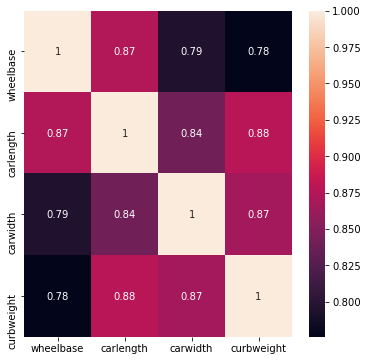

In [33]:
plt.figure(figsize=(6, 6))
sns.heatmap(df[['wheelbase', 'carlength', 'carwidth','curbweight']].corr(),annot=True)
plt.show()

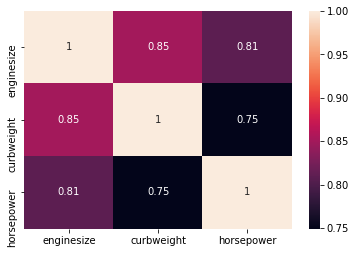

In [34]:
sns.heatmap(df[['enginesize','curbweight','horsepower']].corr(), annot=True)
plt.show()

In these heatmaps we see that some of these values are highly correlated with each other. They need to be dealt with to avoid multicollinearity in the model.

&nbsp;

###  Outliers

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

car_ID               103.00
symboling              2.00
wheelbase              7.90
carlength             16.75
carwidth               2.80
carheight              3.50
curbweight           764.00
enginesize            45.50
boreratio              0.43
stroke                 0.30
compressionratio       0.85
horsepower            46.00
peakrpm              700.00
citympg               11.00
highwaympg             9.00
price               8662.00
dtype: float64


In [36]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(139, 27)

&nbsp;

### Training & Testing the Data

In [37]:
# Dropping values not needed for analysis.
# Dropping highly correlated values or values that are related because of multicollinearity.
df.drop(columns=['CarBrand','car_ID','CarName', 'carlength','carwidth','highwaympg','wheelbase','enginesize'],axis=1,inplace=True)

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['carheight','curbweight', 'boreratio', 'stroke','compressionratio','horsepower','citympg','peakrpm','price']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [39]:
# Getting dummy variables out of categorical variables. Must drop one of the dummy values to avoid dummy variable trap.
dummies = pd.get_dummies(df,drop_first=True)

In [40]:
y = df['price']
X = dummies.drop(columns=['price'])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training the Model

In [42]:
# Fitting the model with test data
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Predicting the Test Data

In [43]:
#Predicting the Variables
predictions = model.predict(X_test)

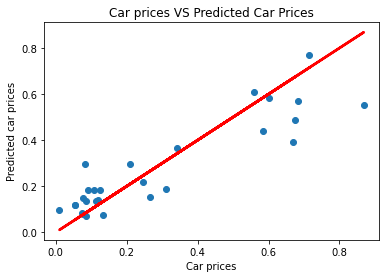

In [44]:
plt.scatter(y_test,predictions)
plt.title('Car prices VS Predicted Car Prices')
plt.xlabel('Car prices')
plt.ylabel('Predicted car prices')

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="red")

plt.show()

##### MODEL 1

In [45]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     21.39
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           4.48e-27
Time:                        08:23:41   Log-Likelihood:                 125.94
No. Observations:                 111   AIC:                            -193.9
Df Residuals:                      82   BIC:                            -115.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3063    

In model 1 we can see the warning that there is still a problem with multicollinearity. I will calculate the VIF score to find the values that are causing the severity of multicollinearity.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

In [47]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
vif_data[vif_data['VIF']>10]

C:\Users\Newton\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
1,carheight,15.609059
2,curbweight,47.340083
3,boreratio,53.824452
4,stroke,24.740366
5,compressionratio,32.712640
6,horsepower,48.273322
7,peakrpm,17.639650
8,citympg,37.661789
12,carbody_hatchback,21.734430
13,carbody_sedan,29.999829


##### MODEL 2

In [48]:
X_train = X_train.drop(['carheight','stroke','compressionratio','peakrpm','drivewheel_fwd',
                        'enginetype_rotor','enginetype_ohc','cylindernumber_two','cylindernumber_four'], axis = 1)

In [49]:
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     22.94
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           5.15e-27
Time:                        08:23:42   Log-Likelihood:                 108.81
No. Observations:                 111   AIC:                            -175.6
Df Residuals:                      90   BIC:                            -118.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2867      0

### Results

####  Which variables are significant in predicting the price of a car

- curbweight         
- aspiration_turbo   
- carbody_hardtop    
- drivewheel_rwd     
- enginetype_l       
- cylindernumber_six 
*** 
#### How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Looking at the price of the cars this data is outdated and not accurate as of 2021. Having more up to date data will be helpful in improving analysis of the car prices. In addition to the outdated prices and car models there was not inclusion of electric cars. We are currently seeing a boom in manufacturing of electric cars with new companies Tesla and Rivian. The companies listed in this dataset are also in development or production of electric vehicles. I believe that adding more data will improve the model and will allow for a more complete picture of which variables are significant in predicting car prices.
 

&nbsp;

### Residual Analysis

In [50]:
lm = sm.OLS(y_train,X_train).fit()
y_train_price = lm.predict(X_train)

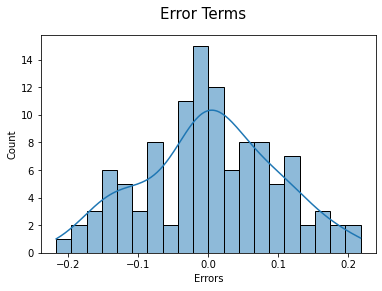

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 20,kde=True)


fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('Errors', fontsize = 10)   
plt.show()

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

&nbsp;